<a href="https://colab.research.google.com/github/Thrishankkuntimaddi/Data-Structures-and-Algorithms-Advanced/blob/main/20%20-%20Trie%20Data%20Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trie Data Structure

Efficient for the following operations on words in a dictionary

1. Search
2. Insert
3. Delete
4. Prefix search
5. Lexicographical ordering of words


                          Trie               Hash
  
        Search        Θ(word_len)         Θ(word_len)

        Insert        Θ(word_len)         Θ(word_len)

        Delete        Θ(word_len)         Θ(word_len)

    Prefix Search    Θ(prefix_len)       Not Supported

    Lexicographical  Θ(output_len)       Not Supported
       ordering

# Trie Representation

In [7]:
class TrieNode:
  child = [None] * 26
  isendfword = False

d = {"geeks", "geek", "bad", "bat", "cat", "cut"}

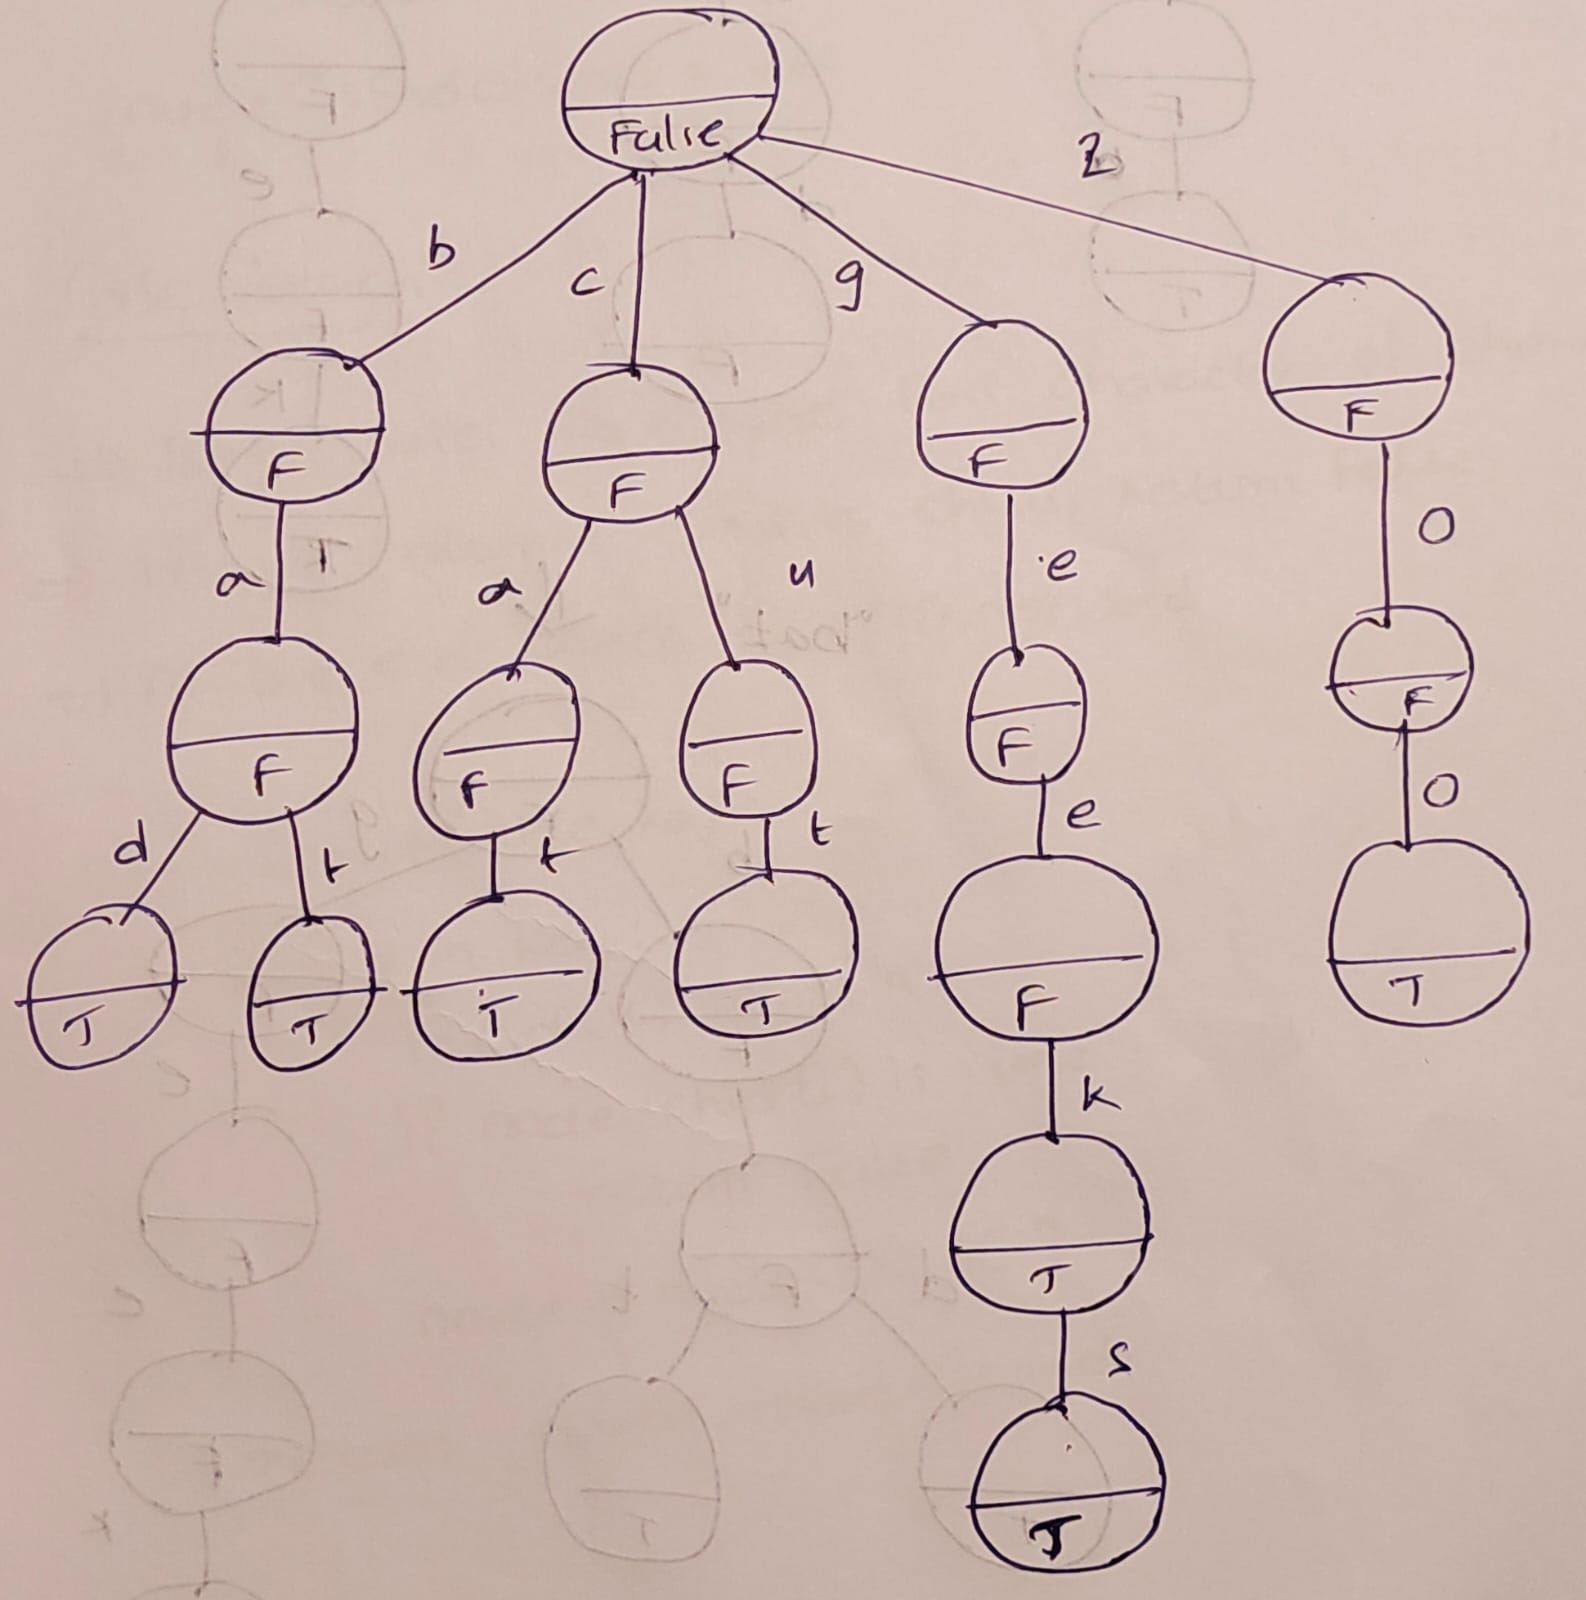

In [8]:
# Trie Insert

class TrieNode:
    def __init__(self):
        self.child = [None] * 26
        self.isEndofWord = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, key):
        node = self.root
        for x in key:
            i = ord(x) - ord('a')
            if node.child[i] is None:
                node.child[i] = TrieNode()
            node = node.child[i]
        node.isEndofWord = True

trie = Trie()
trie.insert("hello")
trie.insert("world")

# Trie Search

-> Begin with Root and First character of character

-> If we do not find a child, return False

-> At the end, check for isEndOfWord

In [9]:
# Trie Search

def search(node, key):
    for x in key:
        i = ord(x) - ord('a')
        if node.child[i] is None:
            return False
        node = node.child[i]
    return node.isEndofWord

print(search(trie.root, "hello"))
print(search(trie.root, "world"))
print(search(trie.root, "hell"))

True
True
False


## Idea for the Delete operations

-> We write a Recursive Function

-> We first traverse to the last node, we make it not end of a word

-> If this node is empty (contains 0 children), remove it

-> If parent of this node had only one child and not end of a word, we remove parent as well

-> we repeat the above step for parent of parent and so on

In [13]:
class TrieNode:
    def __init__(self):
        self.child = [None] * 26
        self.isEndofWord = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, key):
        node = self.root
        for x in key:
            i = ord(x) - ord('a')
            if node.child[i] is None:
                node.child[i] = TrieNode()
            node = node.child[i]
        node.isEndofWord = True

    def delete(self, key):
        def _delete(node, key, depth):
            if node is None:
                return None
            if depth == len(key):
                if node.isEndofWord:
                    node.isEndofWord = False
                if all(child is None for child in node.child):
                    return None
                return node
            index = ord(key[depth]) - ord('a')
            node.child[index] = _delete(node.child[index], key, depth + 1)
            if not node.isEndofWord and all(child is None for child in node.child):
                return None
            return node

        _delete(self.root, key, 0)

    def search(self, key):
        node = self.root
        for x in key:
            i = ord(x) - ord('a')
            if node.child[i] is None:
                return False
            node = node.child[i]
        return node.isEndofWord

trie = Trie()
trie.insert("hello")
trie.insert("world")

print(trie.search("hello"))
print(trie.search("world"))

trie.delete("hello")

print(trie.search("hello"))
print(trie.search("world"))

True
True
False
True


# Count Distinct Rows in a Binary Matrix

I/P : matrix = [[1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1]]

O/P : 2

### Naive

      1. Initialize res = 0
      2. Traverse through all rows
          a. if the current row does not match any of the previous rows
              res = res + 1
      3. return res

      Time Complexity : O(R^2 * C)



In [14]:
# Naive Solution

def countDistinctRows(matrix):
    res = 0
    R = len(matrix)
    C = len(matrix[0]) if R > 0 else 0

    for i in range(R):
        isDistinct = True
        for j in range(i):
            if matrix[i] == matrix[j]:
                isDistinct = False
                break
        if isDistinct:
            res += 1

    return res

matrix = [[1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1]]
result = countDistinctRows(matrix)
print(result)

# Time Complexity : O(R^2 * C)

2


In [15]:
# Trie

class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_row = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, row):
        node = self.root
        for bit in row:
            if bit not in node.children:
                node.children[bit] = TrieNode()
            node = node.children[bit]
        if not node.is_end_of_row:
            node.is_end_of_row = True
            return True
        return False

def countDistinctRows(mat):
    res = 0
    trie = Trie()

    for row in mat:
        if trie.insert(tuple(row)):
            res += 1

    return res

matrix = [[1, 0, 0], [1, 1, 1], [1, 0, 0], [1, 1, 1]]
countDistinctRows(matrix)

# Time Complexiy : O(R * C)

2